In [5]:
!pip install xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


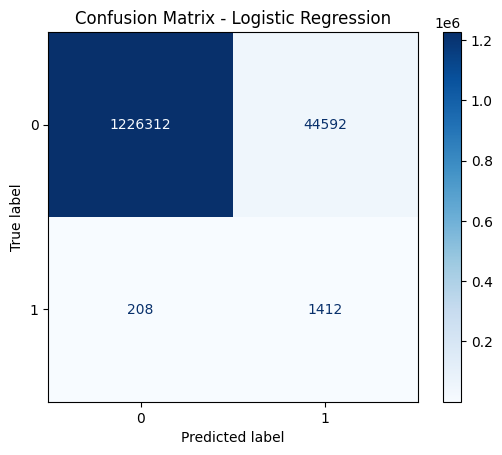


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.965     0.982   1270904
           1      0.031     0.872     0.059      1620

    accuracy                          0.965   1272524
   macro avg      0.515     0.918     0.521   1272524
weighted avg      0.999     0.965     0.981   1272524

Accuracy:  0.9648
Precision: 0.0307
Recall:    0.8716


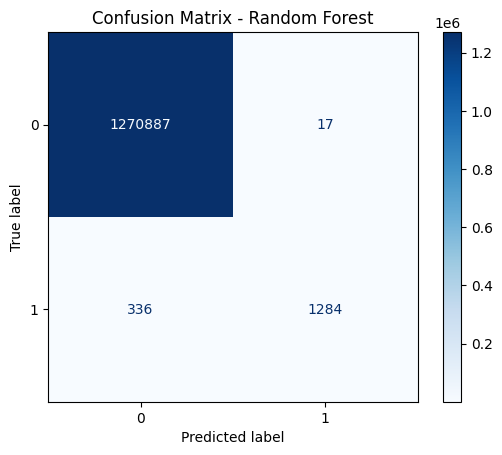


Random Forest Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000   1270904
           1      0.987     0.793     0.879      1620

    accuracy                          1.000   1272524
   macro avg      0.993     0.896     0.940   1272524
weighted avg      1.000     1.000     1.000   1272524

Accuracy:  0.9997
Precision: 0.9869
Recall:    0.7926


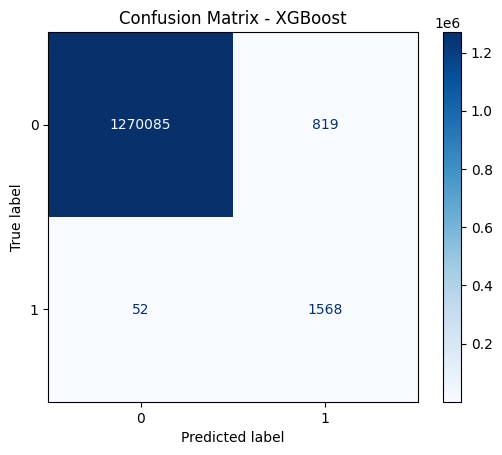


XGBoost Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.999     1.000   1270904
           1      0.657     0.968     0.783      1620

    accuracy                          0.999   1272524
   macro avg      0.828     0.984     0.891   1272524
weighted avg      1.000     0.999     0.999   1272524

Accuracy:  0.9993
Precision: 0.6569
Recall:    0.9679


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score
)

# --- Load dataset ---
df = pd.read_csv('Financial_Fraud_Detection.csv')  # Load transaction data

# Encode 'type' column (e.g., TRANSFER → 1) to make it numeric
df['type'] = LabelEncoder().fit_transform(df['type'])

# --- Feature & Label Setup ---

# Select relevant features for the model (basic transaction attributes)
features = ['step', 'type', 'amount', 'oldbalanceOrg', 
            'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = df[features]
y = df['isFraud']  # Target: whether the transaction is fraudulent

# Fill missing values (if any)
X = X.fillna(0)

# Normalize feature values for better model performance
X_scaled = StandardScaler().fit_transform(X)

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --- Evaluation Function ---
def evaluate(model, name):
    """Print metrics and plot confusion matrix for a model."""
    y_pred = model.predict(X_test)

    # Confusion matrix display
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(
        cmap='Blues', values_format='d'
    )
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Print precision, recall, f1-score for each class
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    # Print common metrics explicitly
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")

# --- Model Training & Evaluation ---

# 1. Logistic Regression (handles imbalance with class_weight)
log_model = LogisticRegression(
    class_weight='balanced', max_iter=1000, solver='liblinear', random_state=42
)
log_model.fit(X_train, y_train)
evaluate(log_model, "Logistic Regression")

# 2. Random Forest Classifier (robust, ensemble method)
rf_model = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42
)
rf_model.fit(X_train, y_train)
evaluate(rf_model, "Random Forest")

# 3. XGBoost Classifier (optimized for imbalance with scale_pos_weight)
xgb_model = XGBClassifier(
    eval_metric='logloss', scale_pos_weight=50, random_state=42
)
xgb_model.fit(X_train, y_train)
evaluate(xgb_model, "XGBoost")


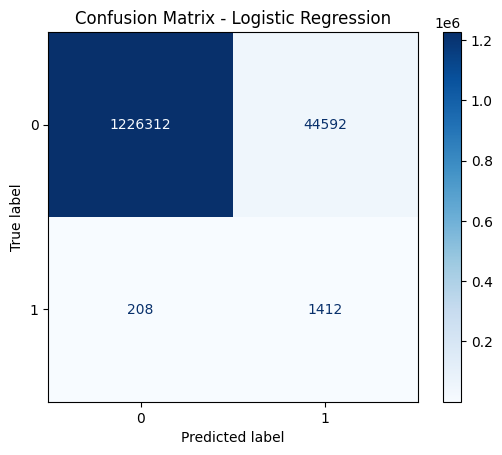


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.965     0.982   1270904
           1      0.031     0.872     0.059      1620

    accuracy                          0.965   1272524
   macro avg      0.515     0.918     0.521   1272524
weighted avg      0.999     0.965     0.981   1272524

Accuracy:  0.9648
Precision: 0.0307
Recall:    0.8716


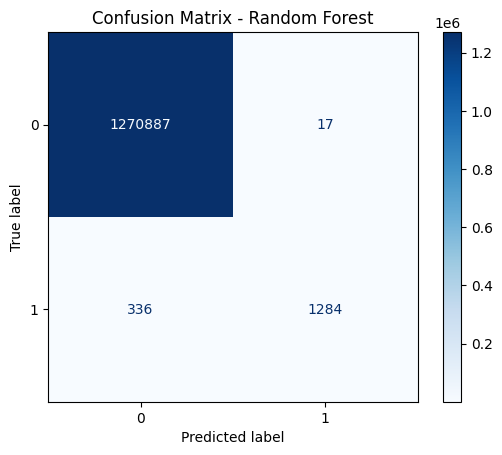


Random Forest Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000   1270904
           1      0.987     0.793     0.879      1620

    accuracy                          1.000   1272524
   macro avg      0.993     0.896     0.940   1272524
weighted avg      1.000     1.000     1.000   1272524

Accuracy:  0.9997
Precision: 0.9869
Recall:    0.7926


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


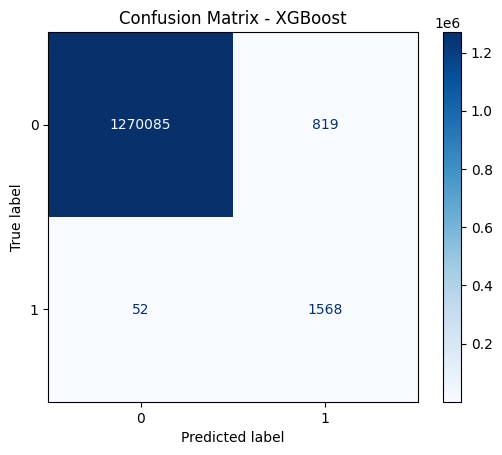


XGBoost Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.999     1.000   1270904
           1      0.657     0.968     0.783      1620

    accuracy                          0.999   1272524
   macro avg      0.828     0.984     0.891   1272524
weighted avg      1.000     0.999     0.999   1272524

Accuracy:  0.9993
Precision: 0.6569
Recall:    0.9679


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score
)

# Load dataset 
df = pd.read_csv('Financial_Fraud_Detection.csv')  # Load transaction data

# Encodes the 'type' column into numeric values by using the LabelEncoder class.
# The fit() method identifies all unique categorical values, and transform() 
# replaces the original strings with corresponding integers.
df['type'] = LabelEncoder().fit_transform(df['type'])

# --- Feature & Label Setup ---

# Select relevant features for the model (basic transaction attributes)
features = ['step', 'type', 'amount', 'oldbalanceOrg', 
            'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = df[features]
y = df['isFraud']  # Target: whether the transaction is fraudulent binary 

# replaces all missing values with 0
X = X.fillna(0)

# Z-normalization feature values for better model performance
X_scaled = StandardScaler().fit_transform(X)

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Evaluation Function
def evaluate(model, name):
    """Print metrics and plot confusion matrix for a model."""
    y_pred = model.predict(X_test)

    # Confusion matrix display
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(
        cmap='Blues', values_format='d'
    )
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Print precision, recall, f1-score for each class
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    # Print common metrics explicitly
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")

# --- Model Training & Evaluation ---

# 1. Logistic Regression (handles imbalance with class_weight)
log_model = LogisticRegression(
    class_weight='balanced', max_iter=1000, solver='liblinear', random_state=42
)
log_model.fit(X_train, y_train)
evaluate(log_model, "Logistic Regression")

# 2. Random Forest Classifier (robust, ensemble method)
rf_model = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42
)
rf_model.fit(X_train, y_train)
evaluate(rf_model, "Random Forest")

# 3. XGBoost Classifier (optimized for imbalance with scale_pos_weight)
xgb_model = XGBClassifier(
    eval_metric='logloss', scale_pos_weight=50, use_label_encoder=False, random_state=42
)
xgb_model.fit(X_train, y_train)
evaluate(xgb_model, "XGBoost")


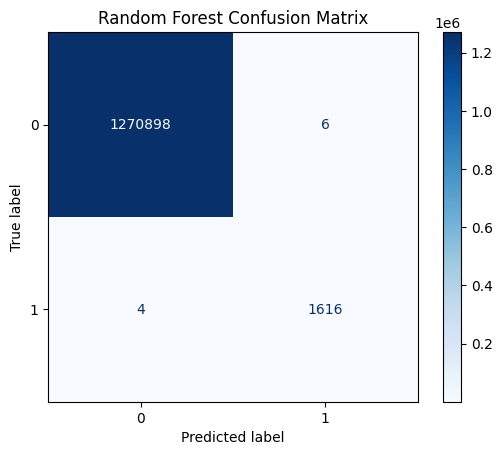


Random Forest Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000   1270904
           1      0.996     0.998     0.997      1620

    accuracy                          1.000   1272524
   macro avg      0.998     0.999     0.998   1272524
weighted avg      1.000     1.000     1.000   1272524

Accuracy:  1.0000
Precision: 0.9963
Recall:    0.9975


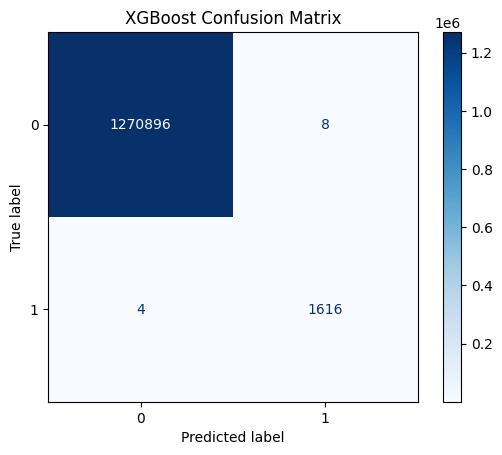


XGBoost Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000   1270904
           1      0.995     0.998     0.996      1620

    accuracy                          1.000   1272524
   macro avg      0.998     0.999     0.998   1272524
weighted avg      1.000     1.000     1.000   1272524

Accuracy:  1.0000
Precision: 0.9951
Recall:    0.9975


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score
)

# --- Load dataset ---
df = pd.read_csv('Financial_Fraud_Detection.csv')  # Load transaction data

# --- Encode 'type' feature (e.g., TRANSFER → 1) ---
df['type'] = LabelEncoder().fit_transform(df['type'])

# --- Feature Engineering Function ---
def add_features(data):
    # Ratio of transaction amount to balance before transfer (avoid div-by-zero)
    data['amount_to_oldbal_ratio'] = data['amount'] / (data['oldbalanceOrg'] + 1)
    
    # Mark complete transfers (new balance is 0 and old balance > 0)
    data['complete_transfer'] = ((data['newbalanceOrig'] == 0) & (data['oldbalanceOrg'] > 0)).astype(int)
    
    # Absolute error in balance update
    data['error_balance'] = (data['oldbalanceOrg'] - data['amount'] - data['newbalanceOrig']).abs()
    
    return data

# Add engineered features to the dataset
df = add_features(df)

# --- Select Features and Target ---
features = [
    'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'error_balance', 'complete_transfer', 'amount_to_oldbal_ratio'
]
X = df[features]             # Feature matrix
y = df['isFraud']            # Target: 1 = fraud, 0 = not fraud

# Fill missing values (if any, e.g., from engineered features)
X = X.fillna(0)

# --- Normalize features using Standard Scaler ---
X_scaled = StandardScaler().fit_transform(X)

# --- Train/Test Split (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --- Evaluation Function ---
def evaluate(model, name):
    """Evaluate a model using classification metrics and plot a confusion matrix."""
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='Blues', values_format='d')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # Classification Report
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred, digits=3))

    # Additional core metrics
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")

# --- Train and Evaluate Models ---

# 1. Random Forest: Ensemble method, good with tabular data
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
evaluate(rf, "Random Forest")

# 2. XGBoost: Boosted trees, tuned for class imbalance using scale_pos_weight
xgb = XGBClassifier(
    eval_metric='logloss', scale_pos_weight=50, random_state=42
)
xgb.fit(X_train, y_train)
evaluate(xgb, "XGBoost")
